In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 
import imageio

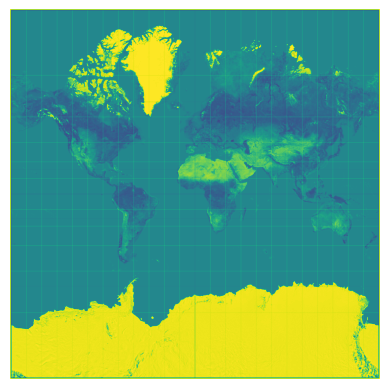

In [2]:

im = cv2.imread('./Mercator_projection_Square.jpeg')
im = cv2.cvtColor(src=im, code=cv2.COLOR_BGR2GRAY) 
plt.axis('off')
plt.imshow(im);

In [16]:
im.shape

(2058, 2058)

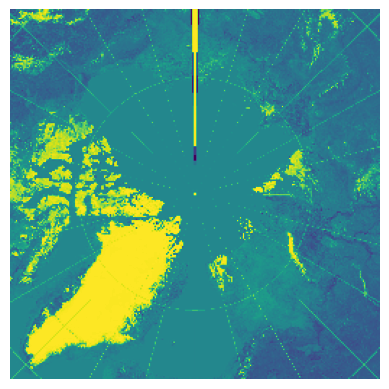

In [3]:
w,h = im.shape

npts = 256
I = np.linspace(-1,1,npts)
X,Y = np.meshgrid(I,I)

phi = np.arccos(1/np.sqrt(X**2 + Y**2 + 1))
theta = np.arctan2(Y,X)

# rescale to sample the image points
xc = h * (theta/(2*np.pi) + .5)
yc = h * phi/np.pi

top = im[yc.astype(int),xc.astype(int)].T
bottom = im[-yc.astype(int),xc.astype(int)]
plt.axis('off')
plt.imshow(top);

#imageio.imwrite('cube_top.png',top)

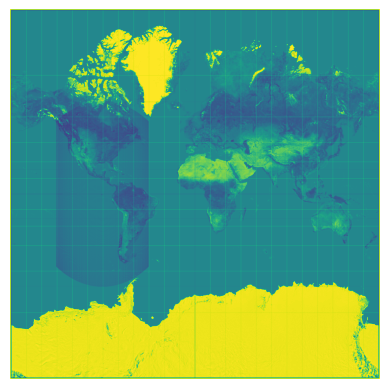

In [313]:
tt  = np.copy(im)
#tt[yc.astype(int),xc.astype(int)] = 0

w,h = im.shape

I = np.linspace(-1,1,npts)
Z,Y = np.meshgrid(I,I)

# I made a mistake in the trigonometry
# arctan2 is a safer choice with signs
phi = np.arctan2(Z, np.sqrt(Y**2 + 1))
theta = np.arctan2(Y,1)

i = 1
ac = h * (theta/(2*np.pi) + .25*i) 
bc = h * (phi/np.pi  + .5)

tt[bc.astype(int), ac.astype(int)] = 1
plt.axis('off')
plt.imshow(tt);



In [314]:
w,h = im.shape
npts = 256

I = np.linspace(-1,1,npts)
Z,Y = np.meshgrid(I,I)

phi = np.arctan2(Z, np.sqrt(Y**2 + 1))
theta = np.arctan2(Y,1)

faces = []
xc = h * theta/(2*np.pi)
yc = h * (phi/np.pi  + .5)
for i in range(4):
    xc += .25*h
    faces.append(im[yc.astype(int), xc.astype(int) % h].T)
    #imageio.imwrite(f'cube_{i}.png',faces[-1])

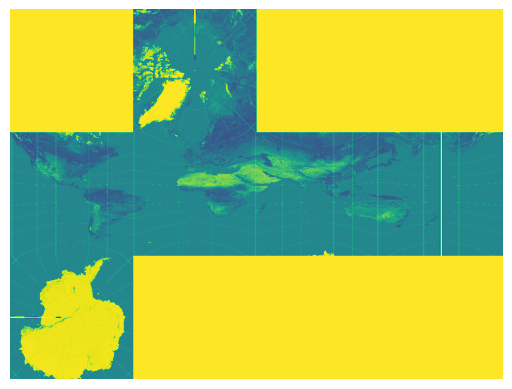

In [317]:
w,h = faces[0].shape

band = 255*np.ones((4*w,3*h),dtype=np.uint8).T
for i, f in enumerate(faces):
    band[h:2*h,w*i:w*(i+1)] = f

band[:h,w:2*w] = top
band[2*h:,:w] = bottom

imageio.imwrite('xx.png',band)
plt.axis('off')
plt.imshow(band)

imageio.imwrite('world.png',band)

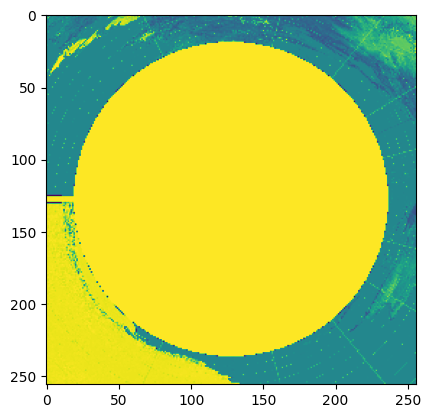

In [9]:
w,h = im.shape

npts = 256
I = np.linspace(-1,1,npts)
X,Y = np.meshgrid(I,I)

theta = np.arctan2(Y,X)
sin_phi = 1/np.sqrt(X**2 + Y**2 + 1)


# rescale to sample the image points
xc = h * (theta/(2*np.pi) + .5)
yc = h * np.log( (1 + sin_phi)/np.sqrt(1 - sin_phi**2))


yc[ yc >= h ]  = h - 1

top = im[xc.astype(int), yc.astype(int)]
#bottom = im[-yc.astype(int),xc.astype(int)]
#plt.axis('off')
plt.imshow(top);


In [7]:
dd =  h * np.log( (1 + sin_phi)/np.sqrt(1 - sin_phi**2)).flatten()

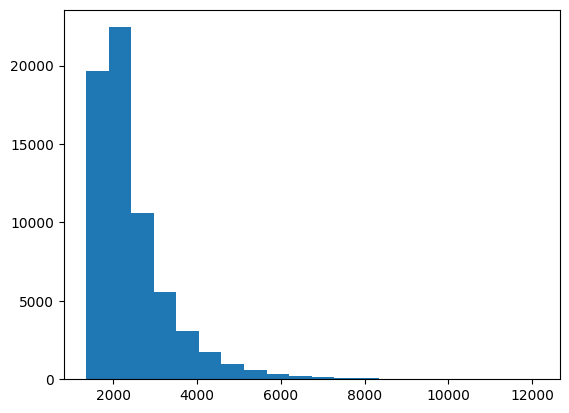

In [10]:
plt.hist(dd, bins= 20);

In [ ]:
6